 ДОМАШНЕЕ ЗАДАНИЕ SVM

 Импорт библиотек:

In [66]:
import numpy as np
import pandas as pd


# from sklearn.datasets import make_classification
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


import matplotlib.pyplot as plt
import seaborn as sns

Загрузка набора данных.

In [67]:
data_cancer = datasets.load_breast_cancer() # подгружаем из хранилища (data, target)

# таблица с данными
X_data_cancer = pd.DataFrame(data=data_cancer["data"], columns=data_cancer["feature_names"]) # наименование колонок
X_data_cancer["target"]  = data_cancer["target"]
y_data_cancer = data_cancer["target"] # результирующий столбец, survived 0, 1

In [68]:
X_data_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [69]:
y_data_cancer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

2. Провести разведочный анализ данных

a) Сколько строк в датафрейме, сколько столбцов
b) Сколько места занимает датафрей в оперативной памяти
 Cколько переменных какого типа используется

In [70]:

print("Количество строк = ", X_data_cancer.shape[0])
print(" Количество столбцов = " , X_data_cancer.shape[1])
print(X_data_cancer.dtypes.value_counts())

Количество строк =  569
 Количество столбцов =  31
float64    30
int32       1
dtype: int64


In [71]:
X_data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [72]:
X_data_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

 c)Подсчитать мин, медиана, среднее, макс и персентили 25, 75

In [73]:
X_data_cancer.describe(percentiles=[.1, .25, .5, .75, .9]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
mean radius,569.0,14.127292,3.524049,6.981000,10.260000,11.700000,13.370000,15.780000,19.530000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,14.078000,16.170000,18.840000,21.800000,24.992000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,65.830000,75.170000,86.240000,104.100000,129.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,321.600000,420.300000,551.100000,782.700000,1177.400000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.079654,0.086370,0.095870,0.105300,0.114820,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.049700,0.064920,0.092630,0.130400,0.175460,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.013686,0.029560,0.061540,0.130700,0.203040,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.011158,0.020310,0.033500,0.074000,0.100420,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.149580,0.161900,0.179200,0.195700,0.214940,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.055338,0.057700,0.061540,0.066120,0.072266,0.09744


 Вывод:

Количество столбцов - 569
Количество строк - 31
Переменные числового типа
Занимает оперативной памяти - 137.9 КВ

3.Подготовка датасета к построению моделей ML
a) Провести анализ и обработку пропусков

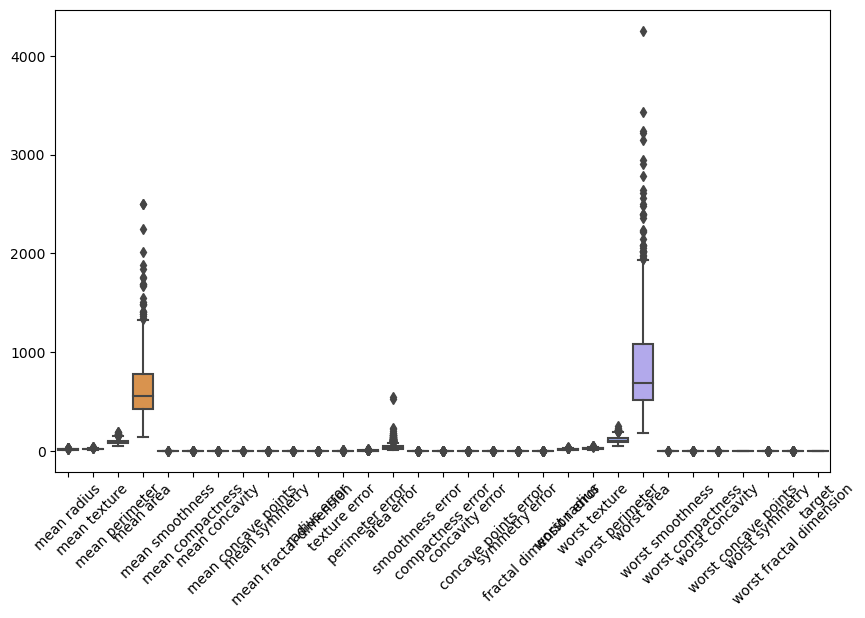

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_data_cancer)
plt.xticks(rotation=45)
plt.show()

In [75]:
#Первый способ нормализации
from sklearn.metrics.pairwise import normalize
normalized_cancer_min_max = (X_data_cancer - X_data_cancer.min())/(X_data_cancer.max() - X_data_cancer.min())

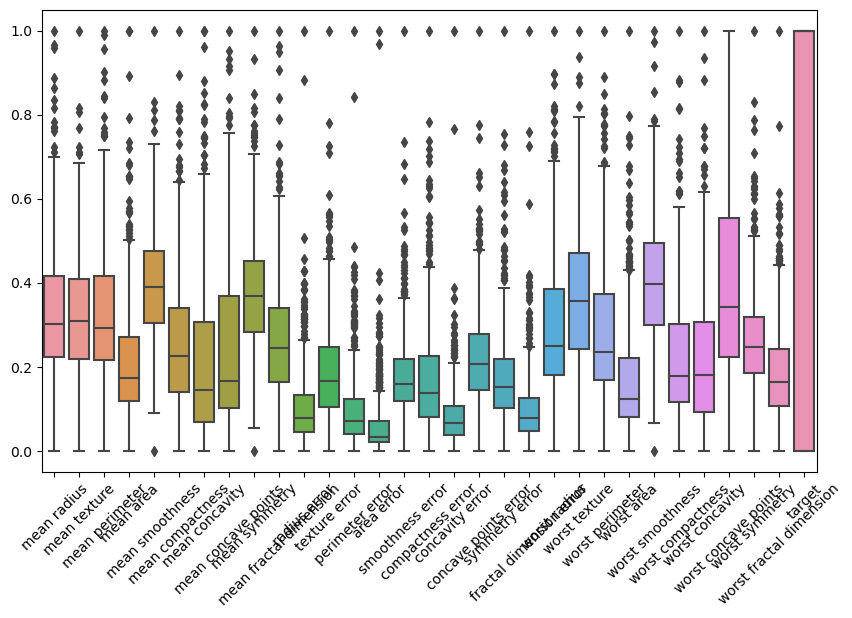

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalized_cancer_min_max)
plt.xticks(rotation=45)
plt.show()

In [77]:
#Второй способ нормализации
normalized_cancer_data_std = (X_data_cancer - X_data_cancer.mean())/X_data_cancer.std()

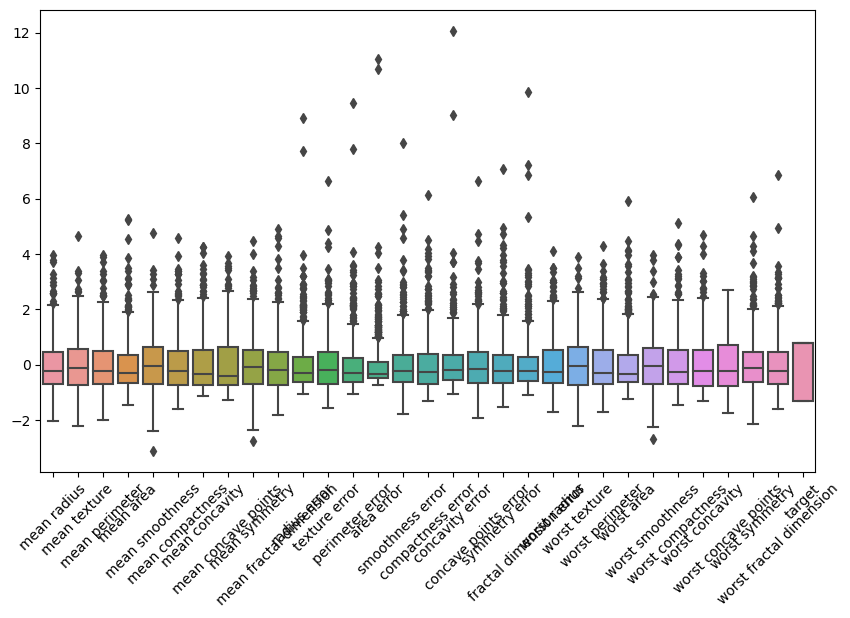

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=normalized_cancer_data_std)
plt.xticks(rotation=45)
plt.show()

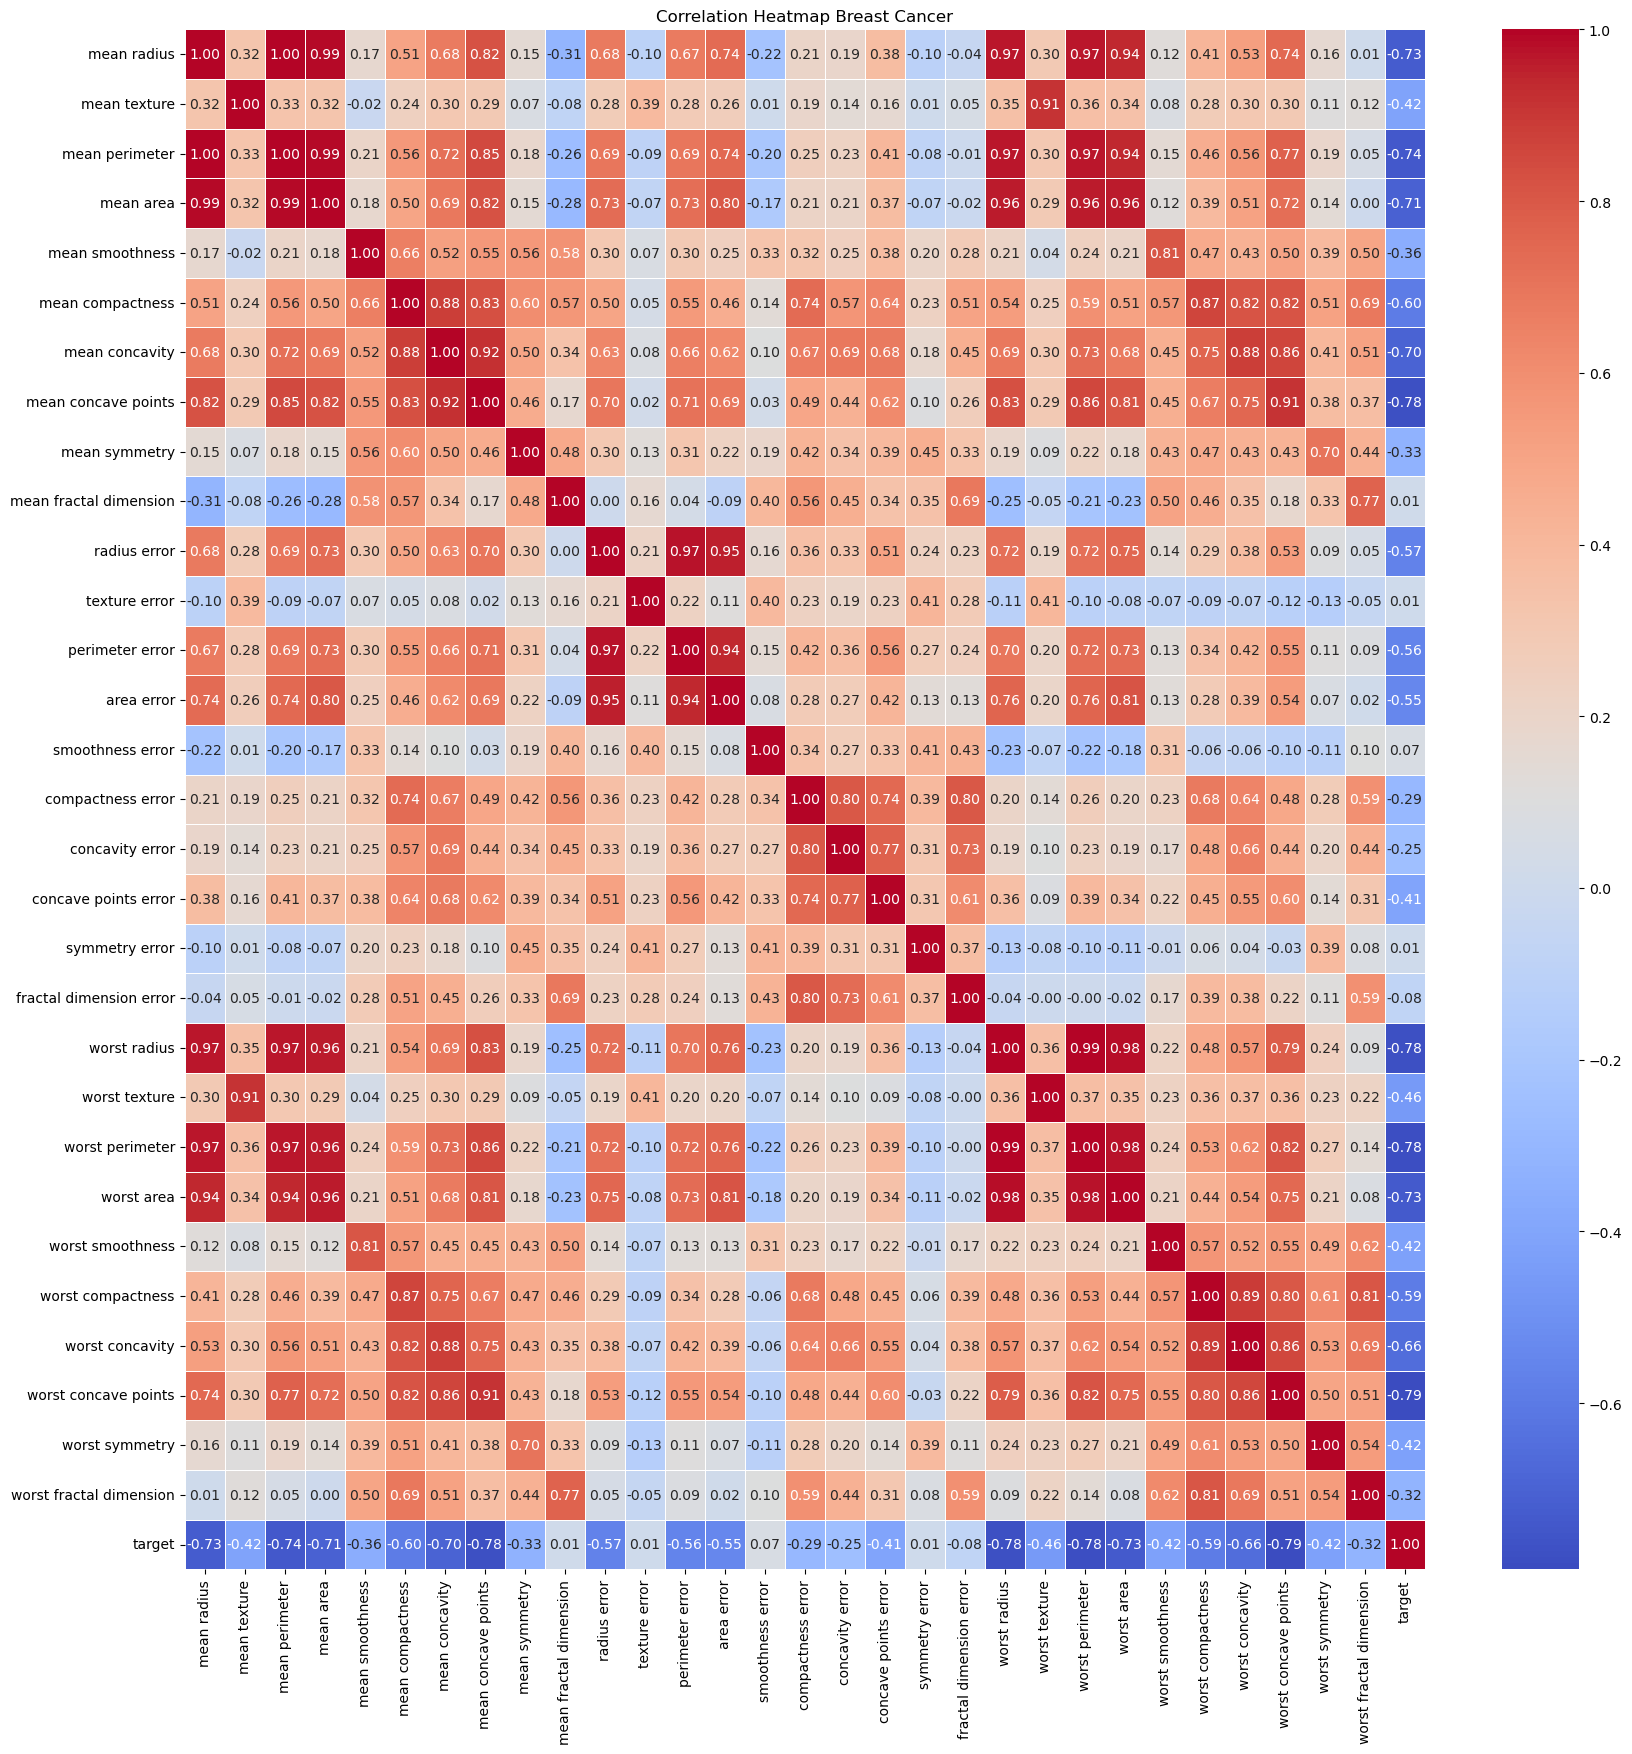

In [79]:
# Построим матрицу корреляций
plt.figure(figsize=(20, 20))
sns.heatmap(X_data_cancer.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap Breast Cancer")
plt.show()

Вывод: имеется сильная корреляция между средним радиусом и средним периметром, а также средней площадью и средним периметром

In [80]:
# распределение целевой
print("\nTarget Class Distribution:")
pd.Series(y_data_cancer).value_counts()


Target Class Distribution:


1    357
0    212
dtype: int64

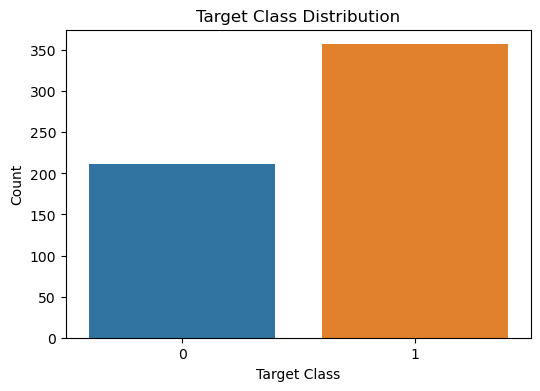

In [81]:
#Посчитаем целевой класс
plt.figure(figsize=(6, 4))
sns.countplot(x=pd.Series(y_data_cancer))
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

In [82]:
X_data_cancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

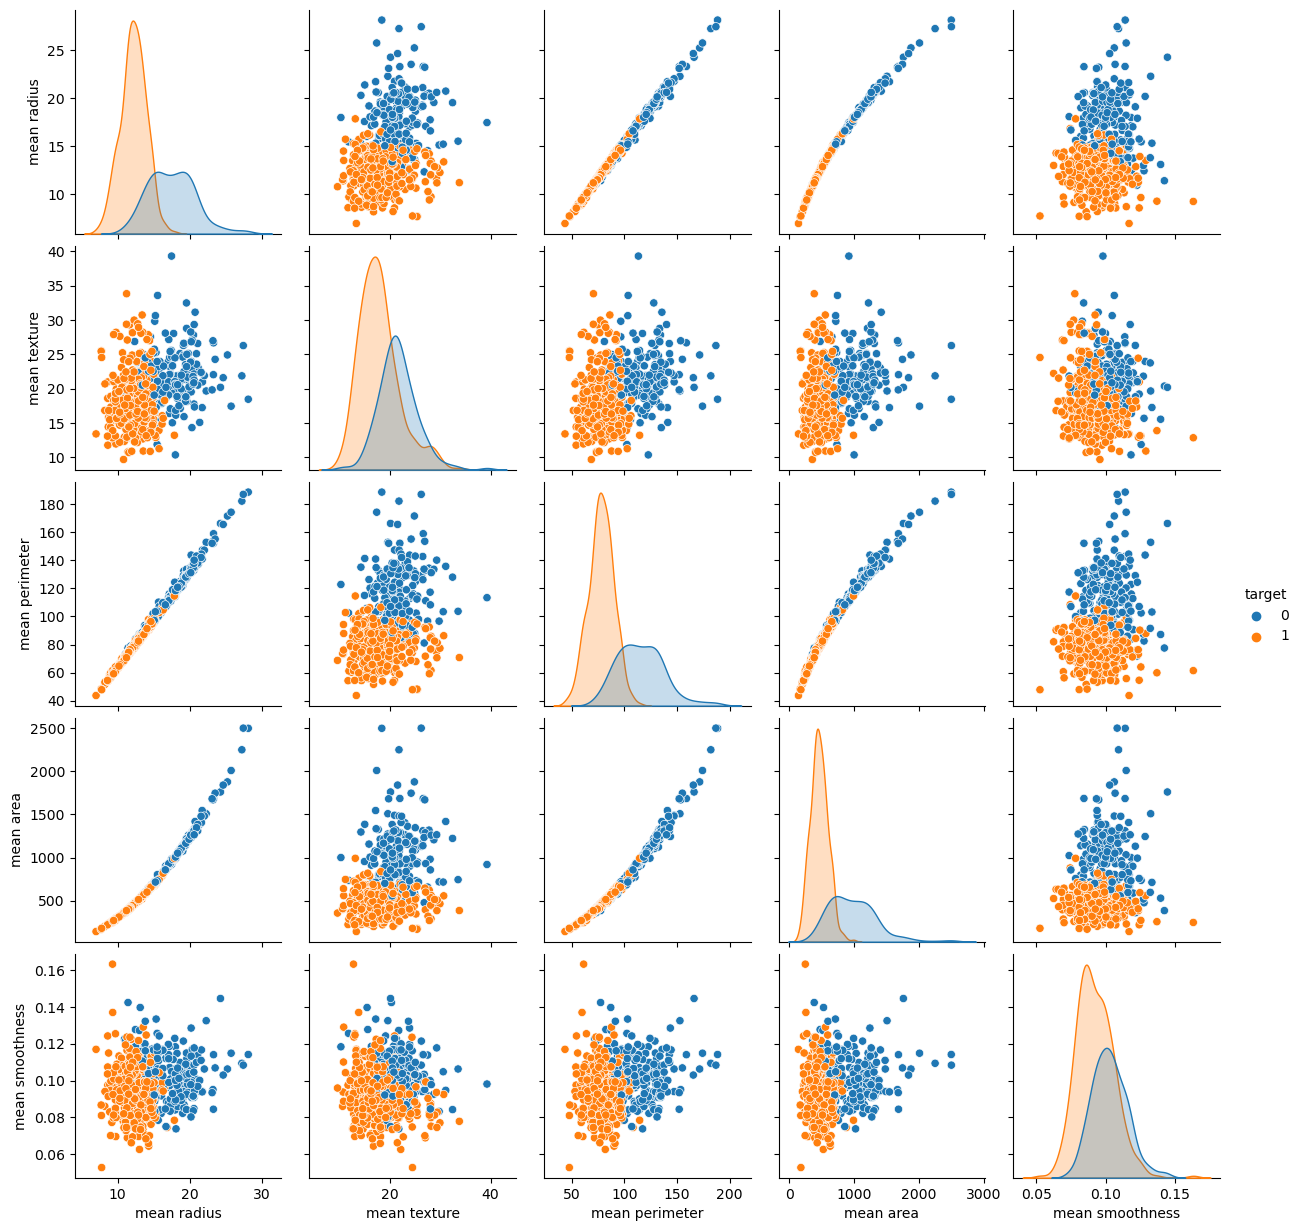

In [83]:
# Парный график образца объекта для первых 5 характеристики 
sns.pairplot(X_data_cancer, hue = 'target',
             vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'])

 Вывод:

В наборе данных нет пропущенных значений, есть незначительные выбросы.

Целевая переменная распределена неравномерно

d) Разделить датасет на трейн и тест

In [84]:
X_data_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [85]:
X_data_cancer=X_data_cancer.drop(['target'], axis = 1)
y=data_cancer['target']

In [86]:
X_data_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Деление набора данных на обучающий и тестовый наборы

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_data_cancer, y, test_size = 0.20, random_state=5)

4. ПОСТРОИТЬ СЛЕДУЮЩИЕ КЛАССИФИКАЦИОННЫЕ АЛГОРИТМЫ:

a) KNN

 Кросс-валидация

In [88]:
#Создать список значений, который надо оценить
k_values = [num for num in range(1, 16)]
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [89]:
mean_scores = []

In [90]:
#Перебор занчений k
for k in k_values:

   # Создание модели k-ближайших соседей
   knn = KNeighborsClassifier(n_neighbors=k)

   # Вычисление средней оценки точности с использованием перекрестной проверки
   scores = cross_val_score(knn, X_data_cancer, y, cv=5, scoring='accuracy')
   mean_scores.append(np.mean(scores))

#Вывод результатов
for k, score in zip(k_values, mean_scores):
    print (f"k ={k} Mean Accuracy: {score}")

k =1 Mean Accuracy: 0.9051079024996118
k =2 Mean Accuracy: 0.9050768514205869
k =3 Mean Accuracy: 0.9191429902189101
k =4 Mean Accuracy: 0.9208818506443098
k =5 Mean Accuracy: 0.9279459711224964
k =6 Mean Accuracy: 0.9244216736531594
k =7 Mean Accuracy: 0.9261760596180716
k =8 Mean Accuracy: 0.9279459711224964
k =9 Mean Accuracy: 0.9314702685918336
k =10 Mean Accuracy: 0.9314702685918336
k =11 Mean Accuracy: 0.9297003570874087
k =12 Mean Accuracy: 0.9332246545567457
k =13 Mean Accuracy: 0.9332401800962584
k =14 Mean Accuracy: 0.9297158826269213
k =15 Mean Accuracy: 0.9297314081664337


In [91]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.945054945054945
0.9385964912280702


In [92]:
n_neighbors=5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [93]:
score=model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  93.85964912280701


In [94]:
# анализ результатов
# матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  7]
 [ 0 66]]


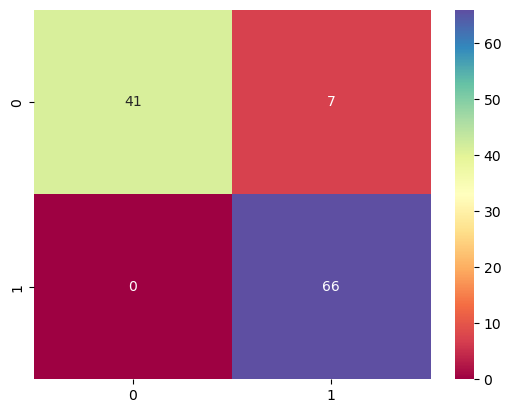

In [95]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
plt.show()

In [96]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print (confusion_matrix (y_test, y_pred))
print (classification_report(y_test, y_pred))



[[41  7]
 [ 0 66]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        48
           1       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



b) SVM

In [97]:
svc_model = SVC()

In [98]:
svc_model.fit(X_train, y_train)

SVC()

In [99]:
#SVM с линейным ядром
# обучение модели
classifierLin = SVC(kernel = 'linear')
classifierLin.fit(X_train, y_train)
print(classifierLin.gamma)
print(classifierLin.C)

scale
1.0


In [100]:
# проверка на тестовых данных
y_pred_svc = classifierLin.predict(X_test)
y_pred_svc

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0])

In [101]:
# анализ результатов
# матрица ошибок
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)

[[46  2]
 [ 1 65]]


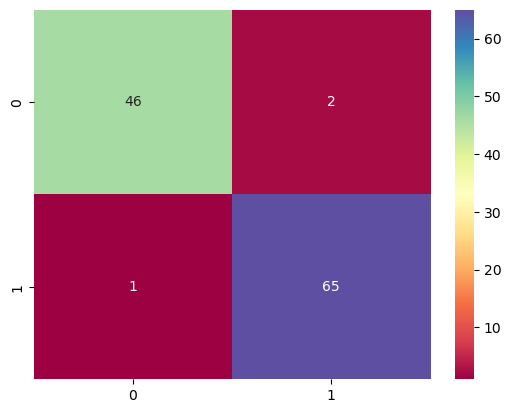

In [102]:
sns.heatmap(cm2, annot=True, fmt='d', cmap='Spectral')
plt.show()

c)ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [103]:
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)

C:\Users\fedor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [104]:
# анализ результатов
# матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  7]
 [ 0 66]]


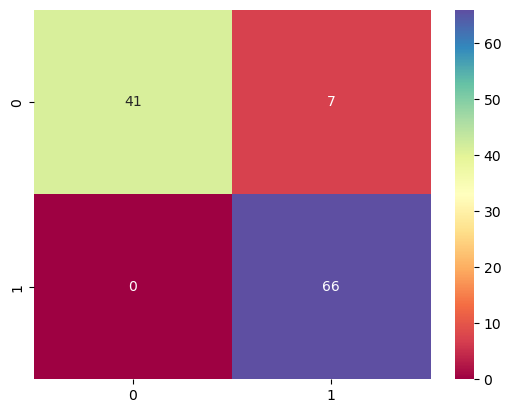

In [105]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
plt.show()

ВЫВОД: Лучшим алгоритмом явился SVM: протестировала модель и обнаружила точность 0,97. Модель классифицировала только 3 случая как злокачественные.